## Introduction à la dérivée et à la descente de gradient

- soit une fonction f(x)
- Sa dérivée, de manière intuitive, peut s’écrire comme
$$
f'(x) \approx \frac{f(x + h) - f(x)}{h} \quad \text{pour un petit } h
$$

Elle donne la **pente de la tangente** en ce point. Cela permet de savoir si l’on monte ou descend, et donc si l’on s’approche ou s’éloigne d’un minimum.

Comme on le verra un peu plus tard, cette notion va nous permettre de **faire une descente de gradient** sur la fonction d’erreur.

L’apprentissage ajuste les poids en suivant le gradient de la fonction d’erreur. Une fonction d’erreur quadratique est pratique car sa dérivée est simple et continue. Les neurones eux peuvent rester linéaires ou avoir des activations non-linéaires, ce qui permet au réseau de modéliser des relations complexes.

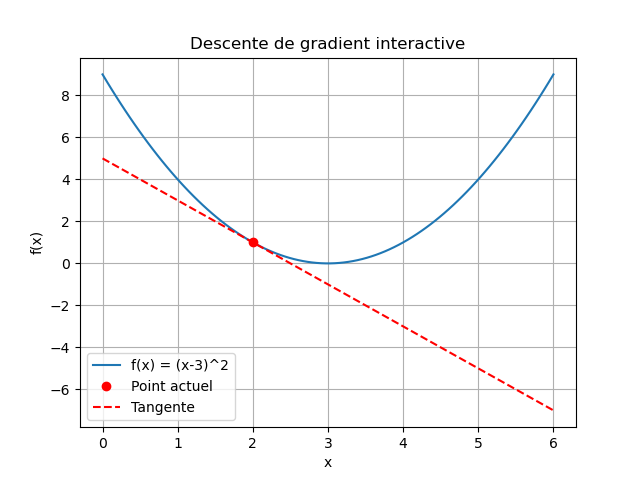

interactive(children=(FloatSlider(value=2.0, description='x0', max=6.0, min=-2.0), Output()), _dom_classes=('w…

<function __main__.plot_gradient(x0=2.0)>

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display

# Fonction et dérivée
def f(x):
    return (x-3)**2

def df(x):
    return 2*(x-3)

# Fonction interactive
def plot_gradient(x0=2.0):
    x = np.linspace(0, 6, 100)
    y = f(x)
    slope = df(x0)
    
    plt.clf()  # Nettoie la figure précédente
    plt.plot(x, y, label="f(x) = (x-3)^2")
    plt.plot(x0, f(x0), 'ro', label="Point actuel")
    plt.plot(x, f(x0) + slope*(x-x0), 'r--', label="Tangente")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Descente de gradient interactive")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create and display the interactive widget
w = interact(plot_gradient, x0=(-2.0, 6.0, 0.1))
display(w)

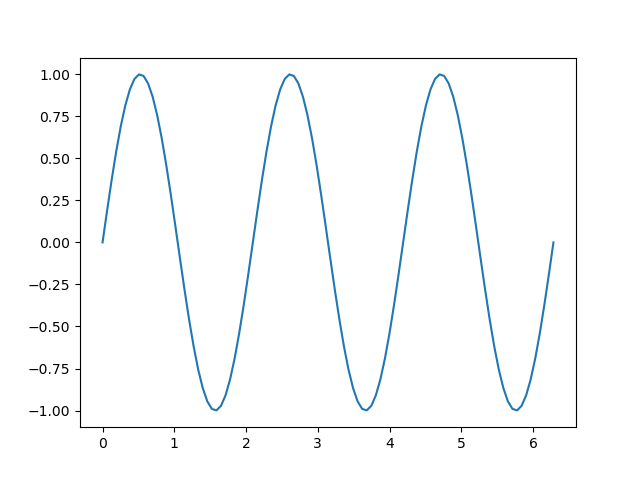

In [2]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)